In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

In [22]:
go_human = pd.read_clipboard()
go_human.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes
0,GO:0002376,immune system process,1.550000e-09,0.000012,"1.86 (1504,203,330,83)",[+] Show genes
1,GO:0051128,regulation of cellular component organization,2.290000e-09,0.000009,"2.62 (1504,277,87,42)",[+] Show genes
2,GO:0065007,biological regulation,1.070000e-08,0.000028,"1.11 (1504,1031,751,571)",[+] Show genes
3,GO:0050789,regulation of biological process,1.360000e-08,0.000027,"1.14 (1504,980,612,454)",[+] Show genes
4,GO:0051246,regulation of protein metabolic process,1.450000e-08,0.000023,"1.58 (1504,273,408,117)",[+] Show genes


In [23]:
del go_human['Genes']

In [24]:
go_human['-logQ'] = -np.log10(go_human['FDR q-value'])
go_human['-logP'] = -np.log10(go_human['P-value'])

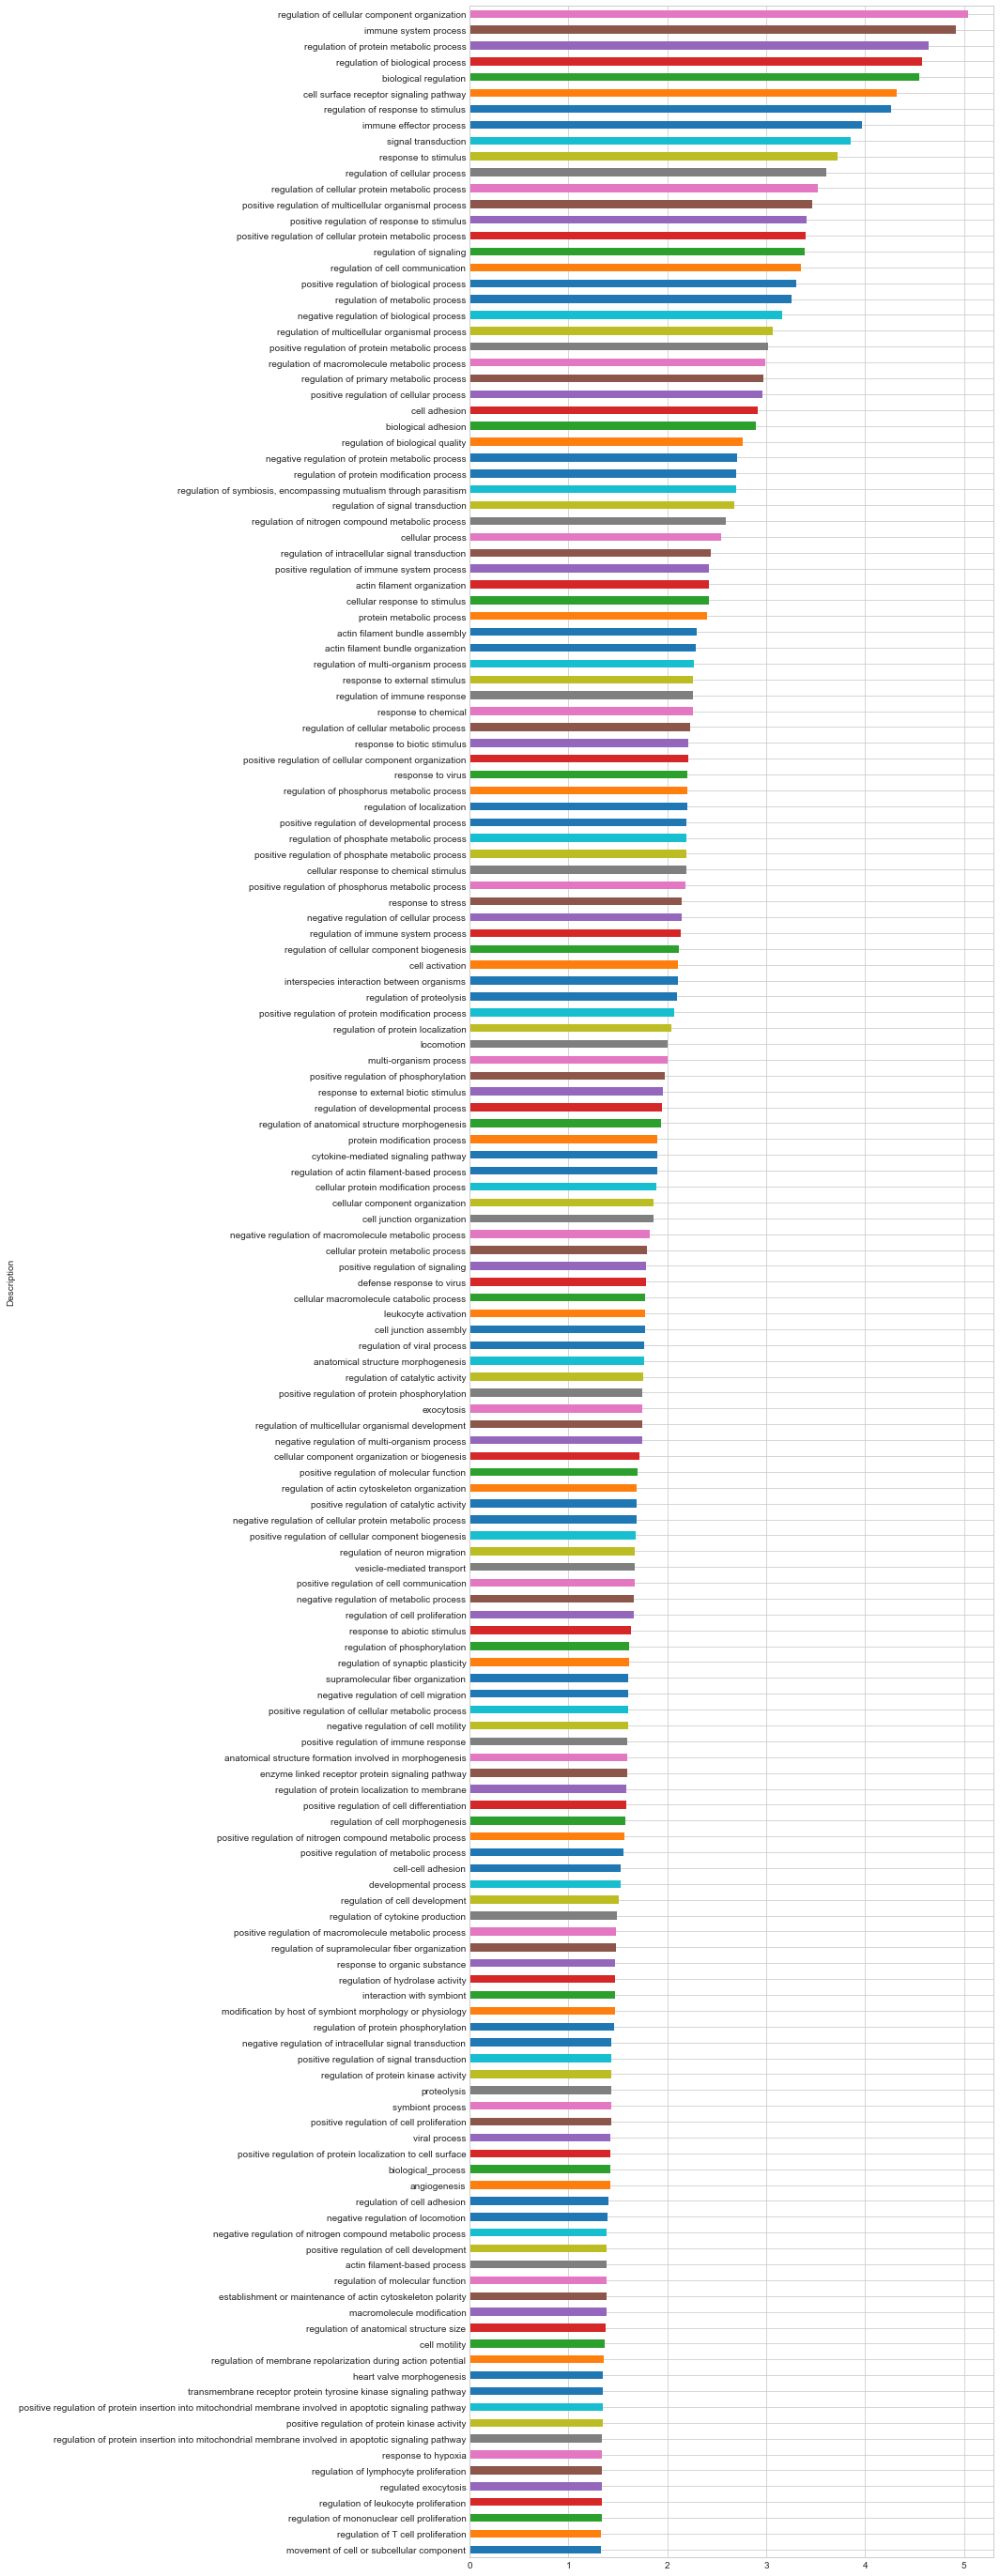

In [25]:
go_human.set_index('Description')['-logQ'].sort_values().plot.barh(figsize=(10,50))
plt.savefig('fig.png')

In [26]:
human = pd.read_csv('DESeq2_data/Yamuna/Normalized_counts_Yamuna_human.tsv', sep='\t')

In [29]:
human = human.set_index('Unnamed: 0').rename_axis('gene')

In [32]:
go = pd.read_json('/Users/alex/Documents/abcd1/json/go_biological_process_genes.json')
go.head()

,GeneSymbol
'de novo' AMP biosynthetic process (GO:0044208),"[ADSL, ADSL, ADSS, ADSS, ADSSL1, ADSSL1]"
'de novo' CTP biosynthetic process (GO:0044210),"[CTPS1, CTPS2]"
'de novo' GDP-L-fucose biosynthetic process (GO:0042351),"[GMDS, GMDS, TSTA3, TSTA3, TSTA3]"
'de novo' IMP biosynthetic process (GO:0006189),"[ADSL, ATIC, GART, PFAS, PFAS, PPAT, PAICS]"
'de novo' L-methionine biosynthetic process (GO:0071266),[CTH]


In [62]:
geneset = go.loc['bicellular tight junction assembly (GO:0070830)'].tolist()[0]

matrix = human.reindex(geneset).dropna()

matrix.head()

,Human_ABCD1_1,Human_ABCD1_2,Human_ABCD1_3,Human_NT_1,Human_NT_2,Human_NT_3
gene,,,,,,
ACTN4,5569.027716,6000.183513,5998.708910,5337.717047,5676.042038,5165.545753
APC,2065.603008,2241.398911,2151.660810,1191.814454,1383.721632,1419.982938
ARL2,700.500842,773.903207,711.087561,713.604206,685.896498,701.750884
CLDN3,0.000000,0.000000,0.000000,2.120666,0.000000,1.734860
DLG1,7310.614566,8062.708570,8004.104620,1699.714030,1928.462619,2014.172500


In [63]:
from sklearn.preprocessing import StandardScaler
matrix = matrix.T
matrix = pd.DataFrame(StandardScaler().fit_transform(matrix), index=matrix.index, columns=matrix.columns)
matrix = matrix.T
matrix.head()

,Human_ABCD1_1,Human_ABCD1_2,Human_ABCD1_3,Human_NT_1,Human_NT_2,Human_NT_3
gene,,,,,,
ACTN4,-0.178571,1.208426,1.203682,-0.922680,0.165686,-1.476543
APC,0.770236,1.189134,0.975300,-1.311884,-0.854595,-0.768190
ARL2,-0.497709,2.119952,-0.120167,-0.030419,-1.018526,-0.453130
CLDN3,-0.701856,-0.701856,-0.701856,1.614406,-0.701856,1.193016
DLG1,0.833783,1.087253,1.067503,-1.057203,-0.980111,-0.951225


In [64]:
labels = pd.Series(matrix.columns.str.split('_').str[1])
labels

0    ABCD1
1    ABCD1
2    ABCD1
3       NT
4       NT
5       NT
dtype: object

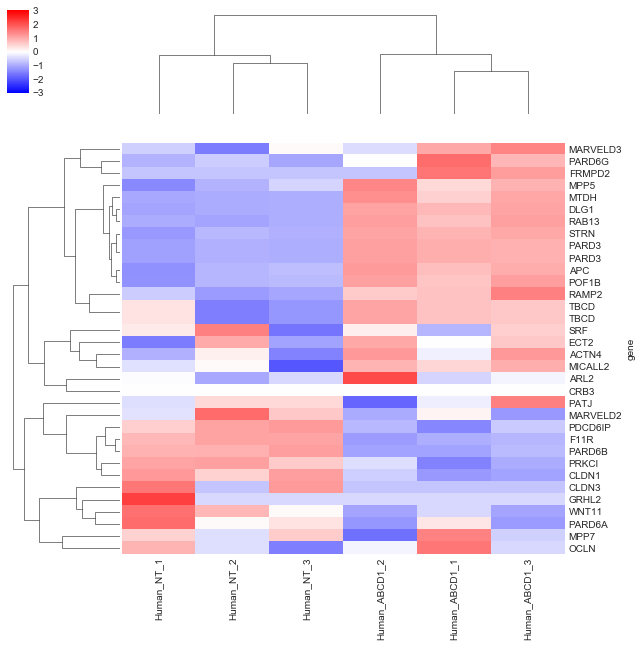

In [68]:
colors = dict(zip(labels.unique(), sns.husl_palette(len(labels.unique()), s=.65)))
label_colors = labels.map(colors)

sns.clustermap(matrix, method='complete', cmap='bwr', col_colors=label_colors, figsize=(10, 10), vmin=-3, vmax=3)

